[[-2, 2], [-2.8682843313646247, 6.923919406317156], [-1.0114573482534253, 2.1722887856996222], [-1.8797416796180502, 7.096208192016777]]
shape는 triangle이고 교점은 -1.08,2.53입니다
0.184243550621243


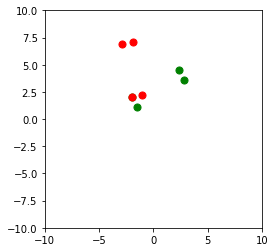

In [43]:
import cv2
import os
from math import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as patches

#좌표 그리기 위한 준비 
fig,ax = plt.subplots()
currentAxis = plt.gca()
plt.xlim([-10,10])
plt.ylim([-10,10])
ax.set_aspect('equal', adjustable='box')

# 회전 변환
degree=70

#(x1,y1)이 회전중심일 때 
x1=-2
y1=2
rotate_center=[x1,y1]
x2=2.33
y2=4.5
x3=-1.5
y3=1.13
x4=2.83
y4=3.63

plot_x=[x1,x2,x3,x4]
plot_y=[y1,y2,y3,y4]
plt.scatter(plot_x,plot_y,s=50,c='g')

##회전!!
#회전 중심은 값이 그대로임
rx1,ry1=rotate_center
#나머지는 점들은 회전 함수를 통해 회전된 값을 구한다 
rx2,ry2=rotation(x2,y2,rotate_center,degree)
rx3,ry3=rotation(x3,y3,rotate_center,degree)
rx4,ry4=rotation(x4,y4,rotate_center,degree)

plot_rx=[rx1,rx2,rx3,rx4]
plot_ry=[ry1,ry2,ry3,ry4]
plt.scatter(plot_rx,plot_ry,s=50,c='r')

original=[[x1,y1],[x2,y2],[x3,y3],[x4,y4]]
rotated_result=[[rx1,ry1],[rx2,ry2],[rx3,ry3],[rx4,ry4]]
print(rotated_result)
if abs(degree)>90:
    print("겹치는 면적이 없습니다")
elif degree<0:#음의 방향으로 회전 
    print("n")
else:#양의 방향으로 회전 
    shape,point_x,point_y=shape_of_iou_positive(original,rotated_result,degree)
    print("shape는 %sangle이고 교점은 %.2f,%.2f입니다" %(shape,point_x,point_y))
    area=iou_positive(point_x,point_y,original,rotated_result,shape)
    print(area)

In [3]:
###각도변환(공통)
def rotation(x,y,rotate_center,degree):
    
    
    temp_x=x-rotate_center[0]
    temp_y=y-rotate_center[1]
     
    #회전변환 공식 
    rad = degree * (pi / 180.0)#각도를 라디안 값으로 변환 
    new_x =cos(rad)*temp_x - sin(rad)*temp_y
    new_y=sin(rad)*temp_x + cos(rad)*temp_y

    #회전한 값을 원래 좌표로 알맞게 바꾼다!!
    rotated_x=new_x+rotate_center[0]
    rotated_y=new_y+rotate_center[1]
    
    return rotated_x,rotated_y

   

In [38]:
###양의 방향으로 회전할 때 교차면적 모양이 삼각형인지 사각형인지 확인하고 교점을 구한다. 
def shape_of_iou_positive(original,rotated_result,degree):
    
    ##사용할 변수 준비
    x1,y1=original[0]
    x2,y2=original[1]
    x3_,y3_=rotated_result[2]
    x4_,y4_=rotated_result[3]
    x4,y4=original[3]
    
    ##만약 면적이 다 겹칠 경우 (즉 회전각도가 0일 때) 
    if float(x4_)==float(x4) and float(y4_)==float(y4):
        return 'rect',x4,y4 #교점을 회전 하기 전 사각형의 (x4,y4)좌표로 한다. 
        
    ###만약 y1과 y2가 같다면 교점은?(이것의 의미는 회전 전 사각형이 회전되지 않은 상태임을 의미)
    if float(y1)==float(y2):
        point_y=y1
        a=(y3_-y4_)/(x3_-x4_)#기울기
        point_x=(point_y+a*x3_-y3_)/a
        
        #x가 x2보다 작은 경우: 삼각형 
        if point_x<=x2:
            return 'tri',point_x,point_y
        #아니면,사각형 
        #사각형의 경우 다시 교점을 구한다. 
        else:
            a=(y3_-point_y)/(x3_-point_x)
            point_x=x2
            point_y=a*(point_x-x3_)+y3_
            return 'rect',point_x,point_y
            
    
    ###회전 전 사각형이 약간 회전되어 있는 상태일 때
    ##직선1 
    #기울기 구하기
    a_1=(y1-y2)/(x1-x2)#직선1의 기울기 
    
    ##직선2
    #기울기 구하기 
    a_2=(y3_-y4_)/(x3_-x4_)#직선2의 기울기 
    
    ##두 직선의 교점의 x좌표와 y좌표구하기 
    point_x=(a_1*x1-y1-a_2*x3_+y3_)/(a_1-a_2)
    point_y=a_1*(point_x-x1)+y1


    ##만약 교점의 x좌표가 x2좌표보다 작으면 교차면적은 삼각형
    ##그렇지 않으면 사각형이다. 
    x2=original[1][0]

    
    #삼각형
    if x2>=point_x:
        return 'tri',point_x,point_y
    else:
        #사각형인 경우 교점을 다시 구한다!!
        ##직선1
        #기울기 구하기 
        a_1=(y3_-y4_)/(x3_-x4_)
        ##직선2
        #기울기 구하기
        a_2=(y2-y4)/(x2-x4)
        #교점
        point_x=(a_1*x3_-y3_-a_2*x2+y2)/(a_1-a_2)
        point_y=a_2*(point_x-x2)+y2
        return 'rect',point_x,point_y
    
    

In [40]:
###양의 방향으로 회전했을 때 교차면적 계산하기 
def iou_positive(point_x,point_y,original,rotated_result,shape):
    
    ###교차면적 형태가 삼각형일 경우
    if shape=='tri':
        #계산에 사용할 변수 준비
        x1,y1=original[0]
        x3_,y3_=rotated_result[2]
        point_x=point_x
        point_y=point_y
        
        ##만약 point_y와 y1값이 같다면 기울기는 0(이때 면적 구하는 법)
        if float(point_y)==float(y1):
            width=point_x-x1
            height=y1-y3_
            area=abs(width*height*1/2)
          
        else:
            ##직선1의 방정식
            #기울기 구하기 
            a_1=(point_y-y1)/(point_x-x1)
            ##직선2의 방정식
            #a_2=-1/a_1 ,수직일 때 기울기 *기울기는 -1이다. 
            #두직선의 교점 
            x=(pow(a_1,2)*x1-(a_1)*y1+x3_+a_1*y3_)/(pow(a_1,2)+1)
            y=a_1*x-a_1*x1+y1

            ##삼각형 밑변의 길이
            width=sqrt(pow(x1-point_x,2)+pow(y1-point_y,2))
            ##삼각형 높이 
            height=sqrt(pow(x-x3_,2)+pow(y-y3_,2))
            #삼각형의 넓이 
            area=abs(width*height/2)
    
    
    ###교차면적의 형태가 사각형이 될 경우 
    if shape=='rect':
        
        #계산에 사용할 변수
        x1,y1=original[0]
        x2,y2=original[1]
        x3_,y3_=rotated_result[2]
        point_x=point_x
        point_y=point_y
        
        ##만약 x2와 point_x의 값이 같다면 기울기는 0 (이때 면적 구하는 법)
        if float(x2)==float(point_x):
            #삼각형1
            width=x2-x1
            height=y1-y3_
            area_1=width*height*1/2
            #삼각형2
            width=y2-point_y
            height=x2-x3_
            area_2=width*height*1/2
            
            area=abs(area_1)+abs(area_2)
        
        else:
            
            ###삼각형 1의 넓이 
            
            ##직선1의 방정식 
            #기울기 구하기 
            a_1=(x3_-x2)/(y3_-y2)
            
            ##직선2의 방정식
            #기울기 
            #-1/a_1 #수직일 때 기울기 *기울기는 -1이다. 
            
            #두직선의 교점 
            x=(pow(a_1,2)*x2-(a_1)*y2+x1+a_1*y1)/(pow(a_1,2)+1)
            y=a_1*(x-x2)+y2
            
            ##삼각형 1의 밑변
            width=sqrt(pow(x3_-x2,2)+pow(y3_-y2,2))
            ##삼각형 1의 높이 
            height=sqrt(pow(x1-x,2)+pow(y1-y,2))
            ##삼각형 1의 넓이 
            area_1=width*height*1/2
            
            
            ###삼각형의 2의 넓이 
            ##직선1의 방정식 
            #기울기 구하기 
            a_1=(y3_-y2)/(x3_-x2)
            
            ##직선2의 방정식
            #기울기 
            #a_2=-1/a_1 ,수직일 때 기울기 *기울기는 -1이다. 
            
            #두직선의 교점 
            x=(pow(a_1,2)*x2-(a_1)*y2+point_x+a_1*point_y)/(pow(a_1,2)+1)
            y=a_1*(x-x2)+y2
            
            ##삼각형 2의 밑변
            width=sqrt(pow(x2-x3_,2)+pow(y2-y3_,2))
            ##삼각형 2의 높이 
            height=sqrt(pow(point_x-x,2)+pow(point_y-y,2))
            ##삼각형 2의 넓이 
            area_2=width*height*1/2
            
            #최종 사각형의 넓이 
            area=abs(area_1)+abs(area_2)
            

        
        
        
        
        
        
        
        
            
    return area
    
    
    
    
    

In [6]:
###음의 방향으로 회전할 때 교차면적 모양이 삼각형인지 사각형인지 확인하고 교점을 구한다. 
def shape_of_iou_negative(original,rotated_result,degree):
    
    ##사용할 변수 준비
    x1,y1=original[0]
    x2,y2=original[1]
    x3_,y3_=rotated_result[2]
    x2_,y2_=rotated_result[1]
    x4_,y4_=rotated_result[3]
    x4,y4=original[3]
     
        
    ###만약 y1과 y2가 같다면 교점은?(이것의 의미는 회전 전 사각형이 회전되지 않은 상태임을 의미)
    if float(y1)==float(y2):
        ##사각형인 경우 
        point_y=y4
        a=(y2_-y4_)/(x2_-x4_)
        point_x=(point_y+a*x2_-y2_)/a
        
        ##삼각형인 경우 
            
    
    ###회전 전 사각형이 약간 회전되어 있는 상태일 때
    ##직선1 
    #기울기 구하기
    a_1=(y1-y2)/(x1-x2)#직선1의 기울기 
    
    ##직선2
    #기울기 구하기 
    a_2=(y3_-y4_)/(x3_-x4_)#직선2의 기울기 
    
    ##두 직선의 교점의 x좌표와 y좌표구하기 
    point_x=(a_1*x1-y1-a_2*x3_+y3_)/(a_1-a_2)
    point_y=a_2*(point_x-x3_)+y3_


    ##만약 교점의 x좌표가 x2좌표보다 작으면 교차면적은 삼각형
    ##그렇지 않으면 사각형이다. 
    x2=original[1][0]

    
    #삼각형
    if x2>=point_x:
        return 'tri',point_x,point_y
    else:
        #사각형인 경우 교점을 다시 구한다!!
        x2,y2=original[1]
        x4,y4=original[3]
        x3_,y3_=rotated_result[2]
        x4_,y4_=rotated_result[3]
        ##직선1
        #기울기 구하기 
        a_1=(y2-y4)/(x2-x4)
        ##직선2
        #기울기 구하기
        a_2=(y3_-y4_)/(x3_-x4_)
        #교점
        point_x=(a_2*x2-y2-a_2*x3_+y3_)/(a_1-a_2)
        point_y=a_1*(x-x2)+y2
        
        return 'rect',point_x,point_y
    
    